In [ ]:
-import pandas as pd

# load dua file
X_train = pd.read_csv("/content/X_train_clean.csv")
X_test = pd.read_csv("/content/X_test_clean.csv")

# gabungkan
X_clean = pd.concat([X_train, X_test], axis=0)

# reset index
X_clean = X_clean.reset_index(drop=True)

# simpan jadi satu file
X_clean.to_csv("heart_clean.csv", index=False)

print("Data berhasil digabung!")
print("Jumlah data:", X_clean.shape)


Data berhasil digabung!
Jumlah data: (918, 20)


Load Data Bersih

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load data hasil preprocessing
df = pd.read_csv("/content/heart_clean.csv")

print(df.shape)
df.head()


(918, 20)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.245067,-0.708985,0.372803,1.842609,2.284353,-0.097061,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.886236,-0.166285,0.086146,-0.542709,1.652241,-0.836286,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.250993,0.919115,0.123134,1.842609,-0.441628,0.087745,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.779375,-0.166285,0.104640,-0.542709,0.229991,-0.836286,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.283314,-0.708985,-1.846478,1.842609,-1.271274,-0.836286,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


BASELINE MODEL (GMM k = 2)

In [ ]:
gmm_baseline = GaussianMixture(n_components=2, random_state=42)
labels_baseline = gmm_baseline.fit_predict(df)

sil_baseline = silhouette_score(df, labels_baseline)

print("Silhouette Score Baseline GMM (k=2):", sil_baseline)


Silhouette Score Baseline GMM (k=2): 0.11614546282555638


GRAFIK SILHOUETTE SCORE (untuk n_components)

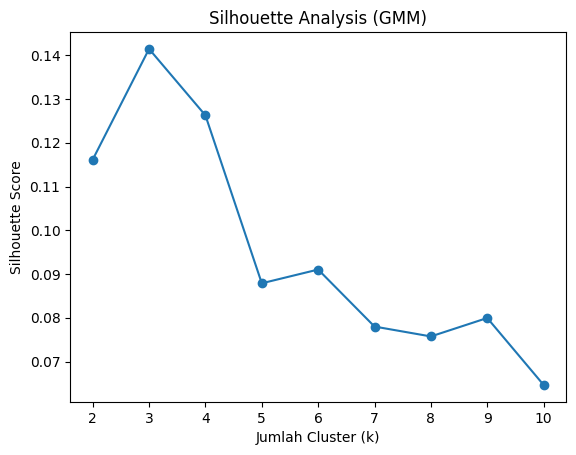

In [ ]:
sil_scores = []
K = range(2, 11)

for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(df)
    score = silhouette_score(df, labels)
    sil_scores.append(score)

plt.figure()
plt.plot(K, sil_scores, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis (GMM)")
plt.show()


MODEL FINAL

In [ ]:
k_final = 3

gmm_final = GaussianMixture(n_components=k_final, random_state=42)
labels_final = gmm_final.fit_predict(df)

sil_final = silhouette_score(df, labels_final)

print("Silhouette Score Model Final GMM (k=3):", sil_final)


Silhouette Score Model Final GMM (k=3): 0.14145166478161966


TABEL EVALUASI

In [ ]:
evaluation_table = pd.DataFrame({
    "Model": ["Baseline GMM", "Final GMM"],
    "Jumlah Cluster": [2, k_final],
    "Silhouette Score": [sil_baseline, sil_final]
})

evaluation_table


,Model,Jumlah Cluster,Silhouette Score
0,Baseline GMM,2,0.116145
1,Final GMM,3,0.141452
